This code is used to scrap the Immoscout website based on some search criteria output a pandas data frame and make simple plotting

In [1]:
import requests
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from bs4 import BeautifulSoup

Create the link string for the search with following criteria (in German):
Type: 'Haus' or 'Wohnung'
For: 'Kauf' or 'Miete'
City: e.g. 'Heidelberg'
Radius: e.g. 20 km '20' (limited options, check the website)

In [3]:
website_part1 = 'https://www.immobilienscout24.de/Suche/S-T'
Type = 'Wohnung'
For = 'Kauf'
City = 'Heidelberg'
Radius = '5'
website_part2 = '/'+Type+'-'+For+'/Umkreissuche/'+City+'/-/-94094/2166498/-/1276001014/'+Radius+'?enteredFrom=one_step_search'
url1 = website_part1+website_part2
print (url1)

https://www.immobilienscout24.de/Suche/S-T/Wohnung-Kauf/Umkreissuche/Boeblingen/-/-94094/2166498/-/1276001014/5?enteredFrom=one_step_search


In [4]:
url1 = "https://www.immobilienscout24.de/Suche/de/baden-wuerttemberg/heidelberg/wohnung-kaufen?enteredFrom=one_step_search"
website_part1 = 'https://www.immobilienscout24.de/Suche/S-T'
website_part2 = "/Wohnung-Kauf/Umkreissuche/-/-/-75564/2087041/-/1276001006/10"

Get the total number of pages to check

In [7]:
r1 = requests.get(url1)
soup = BeautifulSoup(r1.text, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=1" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="noindex, nofollow" name="robots"/>
  <meta content="no-cache, no-store, must-revalidate" http-equiv="cache-control"/>
  <meta content="no-cache" http-equiv="pragma"/>
  <meta content="0" http-equiv="expires"/>
  <title>
   Ich bin kein Roboter - ImmobilienScout24
  </title>
  <link href="https://www.immobilienscout24.de/favicon.ico" rel="icon" type="image/vnd.microsoft.icon"/>
  <link href="https://www.immobilienscout24.de/favicon.ico" rel="shortcut icon" type="image/vnd.microsoft.icon"/>
  <style>
   @font-face {
            font-family: "Make It Sans IS24 Web";
            font-style: normal;
            font-weight: 400;
            font-display: swap;
            src: url("https://www.static-immobiliensco

In [5]:
r1 = requests.get(url1)
soup = BeautifulSoup(r1.text, 'html.parser')
hits = soup.find('span', attrs={'data-is24-qa':'resultlist-resultCount'}).text.strip() ## get the number of hits

hits = hits.replace('.','')
hits = int(hits)
total_pages = int(np.ceil(hits/20))
total_pages
page_listing = ['']
for i in range (2, total_pages+1):
    page_listing.append('/P-'+str(i))
print (page_listing)

AttributeError: 'NoneType' object has no attribute 'text'

In [10]:
IDs = []
for page in page_listing:
    url2 = website_part1+page+website_part2
    r2 = requests.get(url2)
    ID = re.findall(r'data-go-to-expose-id="(\d+)"', r2.text)
    IDs = IDs + ID
    #IDs.append(ID)
IDs = set(IDs)
## Check how many ID (objects) there are
len(IDs)

199

In [11]:
## make empty pandas dataframe
df = pd.DataFrame()
for ID in IDs:
    r3 = requests.get('https://www.immobilienscout24.de/expose/'+str(ID))
    soup = BeautifulSoup(r3.text, 'html.parser') 
    description = soup.find_all('dd')
    ## make empty dictionary to fill with features
    features = {}
    ## assign ID 
    features['ID'] = ID
    ## get Zip
    features['Zip'] = soup.find('span', attrs={'class' : 'zip-region-and-country'}).text[0::]
    ## fill features dictionary with key and values
    for feature in description:
        key = str(re.findall(r'is24qa-(.*)\sgrid-item', str(feature)))[2:-2]
        value = feature.text
        features[key] = value
    ## append features dictionary to dataframe    
    df = df.append(features, ignore_index=True)
## Check the dimensions of the data frame
df.shape    

(199, 31)

In [12]:
## Check the features
list(df)

['',
 'ID',
 'Zip',
 'baujahr',
 'endenergieverbrauch',
 'energieausweistyp',
 'etage',
 'garage-stellplatz',
 'hausgeld',
 'heizungsart',
 'immobilienwert',
 'kaufpreis',
 'objektzustand',
 'provision',
 'typ',
 'wesentliche-energietraeger',
 'wohnflaeche-ca',
 'zimmer',
 'badezimmer',
 'energieausweis',
 'energieeffizienzklasse',
 'mieteinnahmen-pro-monat',
 'schlafzimmer',
 'bezugsfrei-ab',
 'garage-stellplatz-kaufpreis',
 'nutzflaeche-ca',
 'qualitaet-der-ausstattung',
 'endenergiebedarf',
 'energieverbrauchskennwert',
 'modernisierung-sanierung',
 'denkmalschutzobjekt']

In [13]:
## Check the first 10 entries 
df.head(10)

,,ID,Zip,baujahr,endenergieverbrauch,energieausweistyp,etage,garage-stellplatz,hausgeld,heizungsart,...,mieteinnahmen-pro-monat,schlafzimmer,bezugsfrei-ab,garage-stellplatz-kaufpreis,nutzflaeche-ca,qualitaet-der-ausstattung,endenergiebedarf,energieverbrauchskennwert,modernisierung-sanierung,denkmalschutzobjekt
0,Kann ich mir diese Wohnung leisten?,102125820,71067 Sindelfingen,1974,"107,1 kWh/(m²*a)",Verbrauchsausweis,14 von 21,1 Tiefgaragen-Stellplatz,469 €,Zentralheizung,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kann ich mir diese Wohnung leisten?,110255968,71032 Böblingen,1996,169 kWh/(m²*a),Verbrauchsausweis,NaN,1 Tiefgaragen-Stellplatz,NaN,Zentralheizung,...,1.200 €,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kann ich mir diese Wohnung leisten?,107571398,"71083 Herrenberg, Böblingen (Kreis)",2019,NaN,NaN,3 von 3,1 Tiefgaragen-Stellplatz,NaN,Fußbodenheizung,...,NaN,3,Frühjahr/Sommer 2020,22.000 €,10 m²,Gehobene Qualität,NaN,NaN,NaN,NaN
3,Kann ich mir diese Wohnung leisten?,102320601,"71088 Holzgerlingen, Böblingen (Kreis)",2017,NaN,Bedarfsausweis,2 von 3,1 Garage,NaN,Zentralheizung,...,NaN,2,2019 / 2020,20.000 €,NaN,Gehobene Qualität,"37,2 kWh/(m²*a)",NaN,NaN,NaN
4,Kann ich mir diese Wohnung leisten?,109268641,71032 Böblingen,1971,NaN,Verbrauchsausweis,NaN,1 Garage,NaN,NaN,...,NaN,NaN,Vermietet,NaN,NaN,NaN,NaN,"144,4 kWh/(m²*a)",NaN,NaN
5,Kann ich mir diese Wohnung leisten?,106666736,71093 Weil im Schönbuch-Neuweiler,1997,NaN,NaN,2 von 2,1 Tiefgaragen-Stellplatz,150 €,Zentralheizung,...,NaN,NaN,ab sofort,NaN,NaN,Gehobene Qualität,NaN,NaN,NaN,NaN
6,Kann ich mir diese Wohnung leisten?,111426388,71106 Magstadt,1994,NaN,Verbrauchsausweis,1,NaN,NaN,Zentralheizung,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"95,4 kWh/(m²*a)",NaN,NaN
7,Kann ich mir diese Wohnung leisten?,111541598,71034 Böblingen,unbekannt,88 kWh/(m²*a),Verbrauchsausweis,NaN,1 Tiefgaragen-Stellplatz,280 €,Fernwärme,...,NaN,1,sofort,10.000 €,NaN,NaN,NaN,NaN,NaN,NaN
8,Kann ich mir diese Wohnung leisten?,109428493,71067 Sindelfingen,1976,NaN,NaN,17 von 21,1 Tiefgaragen-Stellplatz,429 €,Zentralheizung,...,756 €,NaN,nach Vereinbarung,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Kann ich mir diese Wohnung leisten?,111619840,71116 Gärtringen,1968,"69,54 kWh/(m²*a)",Verbrauchsausweis,5 von 6,1 Garage,279 €,Zentralheizung,...,NaN,1,01.08.,NaN,NaN,Normale Qualität,NaN,NaN,NaN,NaN


Identify the pandas series that contain numbers
Will be used to convert data into numerical or categorical variables

In [14]:
## First replace NaN by empty strings
df = df.replace(np.nan, '', regex=True)

In [15]:
## Create a function to detect numbers
def NumbersDetector (array):
    return sum(array.str.contains('[0-9]', regex=True))    

In [16]:
## Apply the function to the pandas column-wise and count cells with numbers
Numeric_cells_sums = df.apply(NumbersDetector, axis=0)
Numeric_cells_sums

                                 0
ID                             199
Zip                            199
baujahr                        186
endenergieverbrauch             55
energieausweistyp                0
etage                          147
garage-stellplatz              143
hausgeld                        92
heizungsart                      0
immobilienwert                   0
kaufpreis                      199
objektzustand                    0
provision                      130
typ                              0
wesentliche-energietraeger       0
wohnflaeche-ca                 199
zimmer                         199
badezimmer                     152
energieausweis                   0
energieeffizienzklasse           0
mieteinnahmen-pro-monat         25
schlafzimmer                   136
bezugsfrei-ab                   59
garage-stellplatz-kaufpreis     86
nutzflaeche-ca                  53
qualitaet-der-ausstattung        0
endenergiebedarf                46
energieverbrauchsken

In [17]:
## Make a list of columns containing numbers (presumably, mostly numerical features)
Numeric_column_boolean = Numeric_cells_sums > 0
Numeric_column_indices = [i for i, x in enumerate(Numeric_column_boolean) if x]
Numerical_features = [list(df)[index] for index in Numeric_column_indices]
# Remove 'Zip' from it
Numerical_features.remove('Zip')
print (Numerical_features)

['ID', 'baujahr', 'endenergieverbrauch', 'etage', 'garage-stellplatz', 'hausgeld', 'kaufpreis', 'provision', 'wohnflaeche-ca', 'zimmer', 'badezimmer', 'mieteinnahmen-pro-monat', 'schlafzimmer', 'bezugsfrei-ab', 'garage-stellplatz-kaufpreis', 'nutzflaeche-ca', 'endenergiebedarf', 'energieverbrauchskennwert', 'modernisierung-sanierung']


In [18]:
## The rest of the features is assumed to be catergorical for now
Categorical_features = list(set(list(df)).difference(Numerical_features))
print (Categorical_features)

['', 'objektzustand', 'immobilienwert', 'energieausweis', 'qualitaet-der-ausstattung', 'Zip', 'energieausweistyp', 'wesentliche-energietraeger', 'typ', 'energieeffizienzklasse', 'heizungsart', 'denkmalschutzobjekt']


In [19]:
df.Zip = df.Zip.str.extract('(\d+)', expand=False)

In [20]:
## Convert all features in the list of numerical features to float
for feature in Numerical_features:
    df[feature] = df[feature].str.replace('.','')
    df[feature] = df[feature].str.replace(',','.')
    df[feature] = df[feature].str.extract('(\d+.?\d*)', expand=False)
    try:
        df[feature] = df[feature].apply(np.float)
    except Exception:
        print ('Could not convert '+str(feature))


Could not convert provision
Could not convert bezugsfrei-ab


In [21]:
## Convert all features in the list of categorical features to categorical + Zip and ID
for feature in (Categorical_features + ['Zip', 'ID']):
    df[feature] = df[feature].astype('category')

In [22]:
## Check data type for each features
df.dtypes

                               category
ID                             category
Zip                            category
baujahr                         float64
endenergieverbrauch             float64
energieausweistyp              category
etage                           float64
garage-stellplatz               float64
hausgeld                        float64
heizungsart                    category
immobilienwert                 category
kaufpreis                       float64
objektzustand                  category
provision                        object
typ                            category
wesentliche-energietraeger     category
wohnflaeche-ca                  float64
zimmer                          float64
badezimmer                      float64
energieausweis                 category
energieeffizienzklasse         category
mieteinnahmen-pro-monat         float64
schlafzimmer                    float64
bezugsfrei-ab                    object
garage-stellplatz-kaufpreis     float64


In [23]:
## Replace empty string bu NaN
df = df.replace('', np.nan)

In [24]:
## Describe the data
df.describe()

,baujahr,endenergieverbrauch,etage,garage-stellplatz,hausgeld,kaufpreis,wohnflaeche-ca,zimmer,badezimmer,mieteinnahmen-pro-monat,schlafzimmer,garage-stellplatz-kaufpreis,nutzflaeche-ca,endenergiebedarf,energieverbrauchskennwert,modernisierung-sanierung
count,186.000000,55.000000,147.000000,143.000000,92.000000,1.990000e+02,199.000000,199.000000,152.000000,25.000000,136.000000,86.000000,53.000000,46.000000,24.000000,41.000000
mean,1989.215054,102.963091,2.503401,64.265734,299.847826,3.440912e+05,90.039146,3.384422,1.197368,767.160000,2.183824,17116.488372,19.180189,78.428478,113.936667,2013.707317
std,33.602236,36.137809,2.659628,752.507142,105.242466,1.555714e+05,32.146509,1.040449,0.399328,216.723649,0.862402,9052.228418,21.103282,55.655475,42.500874,5.857661
min,1700.000000,18.700000,0.000000,1.000000,110.000000,1.100000e+05,25.000000,1.000000,1.000000,382.000000,1.000000,0.000000,2.000000,20.900000,18.100000,1997.000000
25%,1974.000000,84.000000,1.000000,1.000000,230.000000,2.525000e+05,69.500000,3.000000,1.000000,640.000000,2.000000,10000.000000,6.000000,37.200000,93.300000,2012.000000
50%,1991.000000,101.100000,2.000000,1.000000,281.500000,3.090000e+05,85.920000,3.500000,1.000000,756.000000,2.000000,17900.000000,10.000000,60.000000,110.075000,2016.000000
75%,2016.500000,118.550000,3.000000,1.000000,347.000000,4.200000e+05,105.000000,4.000000,1.000000,900.000000,3.000000,20000.000000,22.000000,105.975000,130.250000,2018.000000
max,2021.000000,259.300000,17.000000,9000.000000,697.000000,1.265000e+06,239.000000,7.000000,2.000000,1200.000000,4.000000,60000.000000,86.300000,263.000000,210.000000,2019.000000


There seems to be houses with a price of 0 Euros (possibly undisclosed). These occurence will be useless and problematique for analysis e.g. log. Let's remove all object with a value less than say 1000 Euros 

In [25]:
df = df.loc[df.kaufpreis > 1000]
df.shape

(199, 31)

Let's plot a few things by curiosity.
1. Let's check the correlation between the surface and the price
2. Let's check the price per square meter for different Zip codes

In [26]:
sns.set(style="whitegrid", color_codes=True)

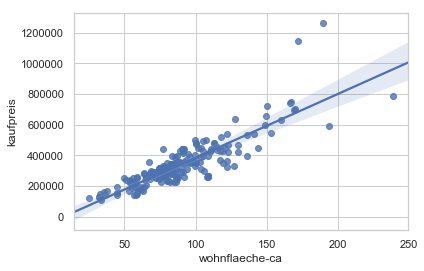

In [32]:
sns.regplot(x= df['wohnflaeche-ca'] , y=df.kaufpreis, data=df)
plt.show()

There seems to be a very large and very expensive object. Let's remove it since it is irrelevant for the model.

In [28]:
df = df.loc[df['wohnflaeche-ca'] < 3000]

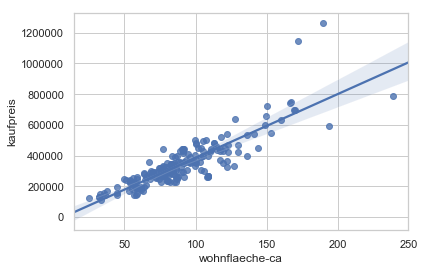

In [31]:
## replot
sns.regplot(x= df['wohnflaeche-ca'] , y=df.kaufpreis, data=df)
plt.show()

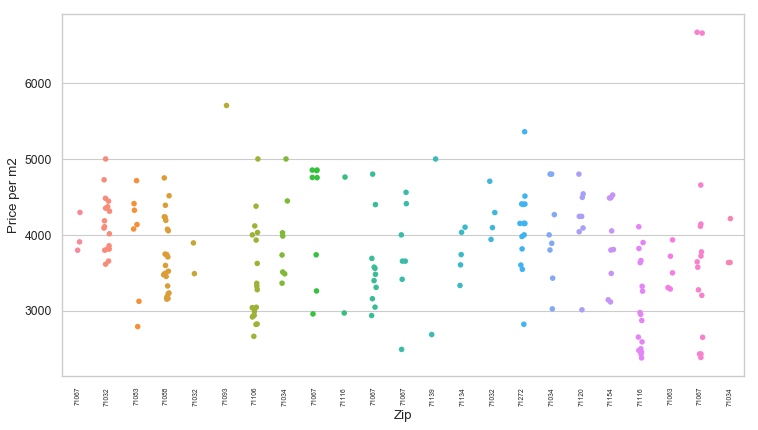

In [33]:
fig=plt.figure(figsize=(11, 6), dpi= 80, facecolor='w', edgecolor='k') ## Make plot bigger
plot = sns.stripplot(x = df.Zip, y = df.kaufpreis/df['wohnflaeche-ca'], data = df, order = set(df.Zip.sort_values()))
plt.ylabel('Price per m2')
plot.set_xticklabels(df.Zip, rotation=90, size=6)
plt.show()

Check the number of features that are complete & make a list of those

In [25]:
complete_features = []
for feature in list(df):
    if df[feature].count() == len(df.index):
        complete_features.append(feature) 
        print (feature)


ID
Zip
grundstueck-ca
kaufpreis
solarenergie
wohnflaeche-ca
zimmer


Check the first 10 observation of all complete features

In [26]:
df[complete_features].head(10)

,,ID,Zip,grundstueck-ca,kaufpreis,solarenergie,wohnflaeche-ca,zimmer
0,Kann ich mir dieses Haus leisten?,106007488.0,68519,379.0,389000.0,Lohnt sich eine Solaranlage?,173.0,7.0
1,Kann ich mir dieses Haus leisten?,105593638.0,69221,487.0,775000.0,Lohnt sich eine Solaranlage?,323.0,10.0
2,Kann ich mir dieses Haus leisten?,107133193.0,68542,273.0,475000.0,Lohnt sich eine Solaranlage?,151.0,6.0
3,Kann ich mir dieses Haus leisten?,107150476.0,68549,300.0,798000.0,Lohnt sich eine Solaranlage?,200.0,7.0
4,Kann ich mir dieses Haus leisten?,106873129.0,68766,739.0,695000.0,Lohnt sich eine Solaranlage?,341.0,15.0
5,Kann ich mir dieses Haus leisten?,104509680.0,69436,430.0,225000.0,Lohnt sich eine Solaranlage?,133.0,5.0
6,Kann ich mir dieses Haus leisten?,106071329.0,67141,1120.0,399000.0,Lohnt sich eine Solaranlage?,250.0,11.0
7,Kann ich mir dieses Haus leisten?,107341687.0,67065,490.0,175000.0,Lohnt sich eine Solaranlage?,74.0,3.0
8,Kann ich mir dieses Haus leisten?,99156367.0,67346,507.0,525000.0,Lohnt sich eine Solaranlage?,300.0,12.0
9,Kann ich mir dieses Haus leisten?,103320832.0,69434,603.0,259000.0,Lohnt sich eine Solaranlage?,170.5,6.0


It seems, solarenergie is useless

Now let's predict the price (Kaufpreis) based on features.

1. The first model will only take 2 features: the surface of total and living area.

2. The second model will only take the list of complete features with Zip (one hot encoded).

3. In the third, we will try to impute missing data of potentially important features to be able to use them in our model and compare performance. 

For the sake of simplicity let's clean up and impute first.

Imputing:

'baujahr': take the median 
'badezimmer': we can assume there is 1 bathroom if nothing else is mentioned (alternative would be to make a regression model on the surface)
'modernisierung-sanierung': none if not mentioned -> equal baujahr
'schlafzimmer': assume #rooms - 1
'garage-stellplatz': if not mentioned -> 0
'heizungsart': take the mode 

In [27]:
selected_feature = ['kaufpreis', 
                    'Zip', 
                    'grundstueck-ca',
                    'wohnflaeche-ca',
                    'zimmer',
                    'badezimmer',
                    'schlafzimmer',
                    'baujahr',
                    'modernisierung-sanierung',
                    'garage-stellplatz',
                    'heizungsart']

In [28]:
df['baujahr'].replace(np.nan, df['baujahr'].median(), inplace = True)

In [29]:
df['modernisierung-sanierung'].replace(np.nan, df['baujahr'], inplace = True)

In [30]:
df['garage-stellplatz'].replace(np.nan, 0, inplace = True)

In [31]:
df.heizungsart.replace(np.nan, df.heizungsart.mode()[0], inplace = True)

In [32]:
df.badezimmer.replace(np.nan, 1, inplace = True)

In [33]:
df.schlafzimmer.replace(np.nan, df.zimmer - 1, inplace = True)

In [34]:
## sub dataframe with important features
df2 = df[selected_feature]

In [35]:
## check completness
df2.count()

kaufpreis                   696
Zip                         696
grundstueck-ca              696
wohnflaeche-ca              696
zimmer                      696
badezimmer                  696
schlafzimmer                696
baujahr                     696
modernisierung-sanierung    696
garage-stellplatz           696
heizungsart                 696
dtype: int64

We need to make encode categorical features (ZIP & heizungsart) using one hot encoding since they are unordered

In [36]:
df2.head(10)

,kaufpreis,Zip,grundstueck-ca,wohnflaeche-ca,zimmer,badezimmer,schlafzimmer,baujahr,modernisierung-sanierung,garage-stellplatz,heizungsart
0,389000.0,68519,379.0,173.0,7.0,2.0,4.0,1964.0,1964.0,0.0,Zentralheizung
1,775000.0,69221,487.0,323.0,10.0,4.0,6.0,1972.0,1972.0,4.0,Zentralheizung
2,475000.0,68542,273.0,151.0,6.0,1.0,5.0,1975.0,1975.0,2.0,Zentralheizung
3,798000.0,68549,300.0,200.0,7.0,2.0,6.0,2012.0,2012.0,3.0,Fußbodenheizung
4,695000.0,68766,739.0,341.0,15.0,1.0,14.0,1963.0,1963.0,6.0,Zentralheizung
5,225000.0,69436,430.0,133.0,5.0,2.0,4.0,1972.0,1972.0,0.0,Fußbodenheizung
6,399000.0,67141,1120.0,250.0,11.0,2.0,10.0,1920.0,1920.0,2.0,Zentralheizung
7,175000.0,67065,490.0,74.0,3.0,1.0,2.0,1927.0,1927.0,0.0,Zentralheizung
8,525000.0,67346,507.0,300.0,12.0,3.0,7.0,1998.0,1998.0,4.0,Zentralheizung
9,259000.0,69434,603.0,170.5,6.0,1.0,5.0,1980.0,1980.0,1.0,Fußbodenheizung


In [37]:
one_hot_Zip = pd.get_dummies(df2['Zip'])
df2 = df2.drop('Zip', axis = 1)
df2 = df2.join(one_hot_Zip)

In [38]:
one_hot_heizungsart = pd.get_dummies(df2['heizungsart'])
df2 = df2.drop('heizungsart', axis = 1)
df2 = df2.join(one_hot_heizungsart)

In [39]:
## make a set of Zip to select later
Zip_features = list(set(df.Zip))

In [40]:
## Same for heizungsart
heizungs_features = list(set(df.heizungsart))

In [41]:
df2.head(20)

,kaufpreis,grundstueck-ca,wohnflaeche-ca,zimmer,badezimmer,schlafzimmer,baujahr,modernisierung-sanierung,garage-stellplatz,64747,...,Fernwärme,Fußbodenheizung,Gas-Heizung,Holz-Pelletheizung,Nachtspeicheröfen,Ofenheizung,Solar-Heizung,Wärmepumpe,Zentralheizung,Öl-Heizung
0,389000.0,379.0,173.0,7.0,2.0,4.0,1964.0,1964.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
1,775000.0,487.0,323.0,10.0,4.0,6.0,1972.0,1972.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0
2,475000.0,273.0,151.0,6.0,1.0,5.0,1975.0,1975.0,2.0,0,...,0,0,0,0,0,0,0,0,1,0
3,798000.0,300.0,200.0,7.0,2.0,6.0,2012.0,2012.0,3.0,0,...,0,1,0,0,0,0,0,0,0,0
4,695000.0,739.0,341.0,15.0,1.0,14.0,1963.0,1963.0,6.0,0,...,0,0,0,0,0,0,0,0,1,0
5,225000.0,430.0,133.0,5.0,2.0,4.0,1972.0,1972.0,0.0,0,...,0,1,0,0,0,0,0,0,0,0
6,399000.0,1120.0,250.0,11.0,2.0,10.0,1920.0,1920.0,2.0,0,...,0,0,0,0,0,0,0,0,1,0
7,175000.0,490.0,74.0,3.0,1.0,2.0,1927.0,1927.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
8,525000.0,507.0,300.0,12.0,3.0,7.0,1998.0,1998.0,4.0,0,...,0,0,0,0,0,0,0,0,1,0
9,259000.0,603.0,170.5,6.0,1.0,5.0,1980.0,1980.0,1.0,0,...,0,1,0,0,0,0,0,0,0,0


Before fitting the models we need to check that the variable to predict if normally distributed

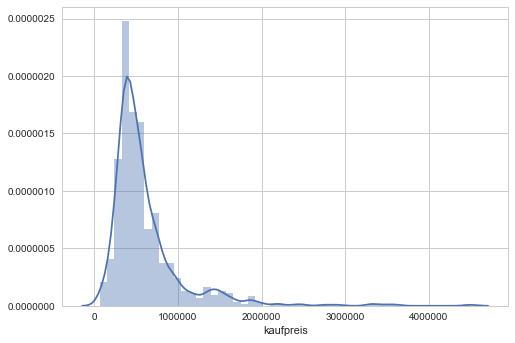

In [42]:
sns.distplot(df2.kaufpreis)
sns.plt.show()

Does not look like a normal distribution. Let's check with log transformation

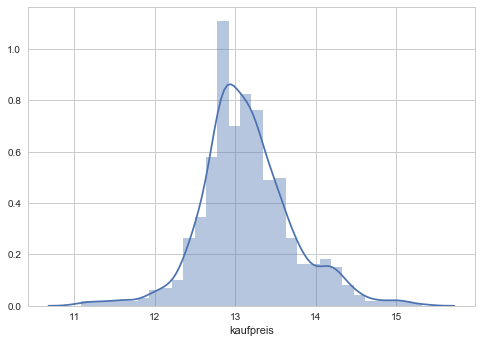

In [43]:
sns.distplot(np.log(df2.kaufpreis))
sns.plt.show()

Looks better. Let's make a normality test

In [44]:
import scipy.stats as stats 
stats.shapiro(np.log(df2.kaufpreis))

(0.9704622030258179, 1.2256361203721866e-10)

Looks normal

In [62]:
from sklearn.model_selection import train_test_split

houses_train, houses_test = train_test_split(df2, test_size=0.25, 
                                             random_state=1)

First model: only surface total and living area

In [63]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error

houses_y_train = np.log(houses_train[['kaufpreis']])
houses_X_train = houses_train[['grundstueck-ca', 'wohnflaeche-ca']]

price_model1 = linear_model.LinearRegression()

price_model1.fit(houses_X_train, houses_y_train)

## Extract the intercept
print('Intercept: \n', price_model1.intercept_)

## Extract the coefficients
print('Coefficients: \n', price_model1.coef_)

Intercept: 
 [ 12.4517072]
Coefficients: 
 [[  3.51679163e-05   3.08020409e-03]]


In [64]:
## Calculate fitted income values
price_fitted = price_model1.predict(houses_X_train)
price_fitted

print ('For the train set, model 1: \n')

## The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(houses_y_train, price_fitted))

## The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(houses_y_train, price_fitted))

## Coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(houses_y_train, price_fitted))

## Explained variance score: 1 is perfect prediction
print('Explained variance score: %.2f' % explained_variance_score(houses_y_train, price_fitted))

For the train set, model 1: 

Mean squared error: 0.21
Mean absolute error: 0.33
Coefficient of determination: 0.42
Explained variance score: 0.42


In [66]:
houses_y_test = np.log(houses_test[['kaufpreis']])
houses_X_test = houses_test[['grundstueck-ca', 'wohnflaeche-ca']]

## Calculate fitted income values
price_fitted = price_model1.predict(houses_X_test)
price_fitted

print ('For the test set, model 1: \n')

## The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(houses_y_test, price_fitted))

## The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(houses_y_test, price_fitted))

## Coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(houses_y_test, price_fitted))

## Explained variance score: 1 is perfect prediction
print('Explained variance score: %.2f' % explained_variance_score(houses_y_test, price_fitted))

For the test set, model 1: 

Mean squared error: 0.14
Mean absolute error: 0.27
Coefficient of determination: 0.43
Explained variance score: 0.43


In [67]:
features_for_model_2 = Zip_features + ['grundstueck-ca', 'wohnflaeche-ca','zimmer']

In [68]:
houses_y_train = np.log(houses_train[['kaufpreis']])
houses_X_train = houses_train[features_for_model_2]

price_model2 = linear_model.LinearRegression()

price_model2.fit(houses_X_train, houses_y_train)

## Extract the intercept
print('Intercept: \n', price_model2.intercept_)

## Extract the coefficients
print('Coefficients: \n', price_model2.coef_)

Intercept: 
 [ 12.54585221]
Coefficients: 
 [[ -9.35687091e-02  -2.54631469e-01   1.30654617e-01   7.98386981e-01
    5.46551895e-01  -1.72368194e-01  -5.76127421e-01   1.63326418e-02
   -2.69338455e-03   1.11483298e+00   2.90382390e-01   1.01136652e+00
    1.08572481e-02  -7.20474043e-01   9.99776130e-02  -2.07639236e-01
   -3.60993222e-01  -1.04061374e-01  -5.38364283e-01   2.54608303e-01
   -3.45390410e-02  -9.80694293e-02   2.27403103e-02   1.57995328e-01
    2.91559911e-01  -3.88154593e-01  -1.79362915e-02   8.48690724e-02
    9.78447357e-03   8.44935662e-01  -1.65189471e-01   3.20700795e-03
    2.90719830e-01   9.08182046e-02   2.46496065e-02   2.03562915e-01
   -7.11559762e-01   9.61149945e-02   7.25088546e-03   1.73029461e-02
   -9.82965109e-02  -3.70994794e-01   4.39699430e-02  -3.65395229e-02
   -5.90405640e-02   8.51399089e-02  -1.95354608e-02   7.08590511e-01
    5.59688746e-02   7.83495216e-02   1.51687662e-02   5.17371114e-01
   -2.97633222e-02  -5.00480068e-02  -2.495839

In [69]:
## Calculate fitted income values
price_fitted = price_model2.predict(houses_X_train)
price_fitted

print ('For the train set, model 2: \n')

## The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(houses_y_train, price_fitted))

## The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(houses_y_train, price_fitted))

## Coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(houses_y_train, price_fitted))

## Explained variance score: 1 is perfect prediction
print('Explained variance score: %.2f' % explained_variance_score(houses_y_train, price_fitted))

For the train set, model 2: 

Mean squared error: 0.11
Mean absolute error: 0.23
Coefficient of determination: 0.71
Explained variance score: 0.71


In [71]:
houses_y_test = np.log(houses_test[['kaufpreis']])
houses_X_test = houses_test[features_for_model_2]

## Calculate fitted income values
price_fitted = price_model2.predict(houses_X_test)
price_fitted

print ('For the test set, model 2: \n')

## The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(houses_y_test, price_fitted))

## The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(houses_y_test, price_fitted))

## Coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(houses_y_test, price_fitted))

## Explained variance score: 1 is perfect prediction
print('Explained variance score: %.2f' % explained_variance_score(houses_y_test, price_fitted))

For the test set, model 2: 

Mean squared error: 0.10
Mean absolute error: 0.24
Coefficient of determination: 0.58
Explained variance score: 0.58


In [72]:
houses_y_train = np.log(houses_train[['kaufpreis']])
houses_X_train = houses_train.drop('kaufpreis', axis=1)

price_model3 = linear_model.LinearRegression()

price_model3.fit(houses_X_train, houses_y_train)

## Extract the intercept
print('Intercept: \n', price_model3.intercept_)

## Extract the coefficients
print('Coefficients: \n', price_model3.coef_)

Intercept: 
 [  4.48061874e+08]
Coefficients: 
 [[  2.14393934e-05   2.68621827e-03  -7.33040558e-03   3.46375098e-02
    1.19741482e-03  -1.03861842e-04   2.13897651e-03   1.86371653e-02
   -1.56584824e+07  -1.56584828e+07  -1.56584823e+07  -1.56584823e+07
   -1.56584822e+07  -1.56584822e+07  -1.56584823e+07  -1.56584820e+07
   -1.56584819e+07  -1.56584822e+07  -1.56584823e+07  -1.56584820e+07
   -1.56584819e+07  -1.56584821e+07  -1.56584819e+07  -1.56584811e+07
   -1.56584812e+07  -1.56584822e+07  -1.56584820e+07  -1.56584821e+07
   -1.56584821e+07  -1.56584818e+07  -1.56584817e+07  -1.56584820e+07
   -1.56584821e+07  -1.56584821e+07  -1.56584817e+07  -1.56584818e+07
   -1.56584819e+07  -1.56584821e+07  -1.56584819e+07  -1.56584821e+07
   -1.56584819e+07  -1.56584821e+07  -1.56584817e+07  -1.56584822e+07
   -1.56584821e+07  -1.56584821e+07  -1.56584821e+07  -1.56584821e+07
   -1.56584814e+07  -1.56584803e+07  -1.56584816e+07  -1.56584809e+07
   -1.56584810e+07  -1.56584825e+07  -1.56

In [73]:

## Calculate fitted income values
price_fitted = price_model3.predict(houses_X_train)
price_fitted

print ('For the train set, model 3: \n')

## The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(houses_y_train, price_fitted))

## The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(houses_y_train, price_fitted))

## Coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(houses_y_train, price_fitted))

## Explained variance score: 1 is perfect prediction
print('Explained variance score: %.2f' % explained_variance_score(houses_y_train, price_fitted))

For the train set, model 3: 

Mean squared error: 0.09
Mean absolute error: 0.21
Coefficient of determination: 0.76
Explained variance score: 0.76


In [74]:
houses_y_test = np.log(houses_test[['kaufpreis']])
houses_X_test = houses_test.drop('kaufpreis', axis=1)

## Calculate fitted income values
price_fitted = price_model3.predict(houses_X_test)
price_fitted

print ('For the test set, model 3: \n')

## The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(houses_y_test, price_fitted))

## The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(houses_y_test, price_fitted))

## Coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(houses_y_test, price_fitted))

## Explained variance score: 1 is perfect prediction
print('Explained variance score: %.2f' % explained_variance_score(houses_y_test, price_fitted))

For the test set, model 3: 

Mean squared error: 0.11
Mean absolute error: 0.25
Coefficient of determination: 0.54
Explained variance score: 0.54
